# Exploratory Data Anaysis and Predictive Modeling  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
from IPython.display import Image
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from scipy import stats
from sklearn.metrics import accuracy_score 
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn import linear_model
from sklearn.linear_model import Ridge


Bad key "text.kerning_factor" on line 4 in
/Users/fenglanjiang/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


# Data Exploration 

In [2]:
## Load datasets
data = pd.read_csv("~/Desktop/STA160/train.csv")
unique = pd.read_csv("~/Desktop/STA160/unique_m.csv")

In [3]:
data[['number_of_elements']].idxmax()

number_of_elements    5231
dtype: int64

In [4]:
unique

H  He   Li   Be    B    C    N     O    F  Ne  ...   Au   Hg   Tl  \
0      0.0   0  0.0  0.0  0.0  0.0  0.0   4.0  0.0   0  ...  0.0  0.0  0.0   
1      0.0   0  0.0  0.0  0.0  0.0  0.0   4.0  0.0   0  ...  0.0  0.0  0.0   
2      0.0   0  0.0  0.0  0.0  0.0  0.0   4.0  0.0   0  ...  0.0  0.0  0.0   
3      0.0   0  0.0  0.0  0.0  0.0  0.0   4.0  0.0   0  ...  0.0  0.0  0.0   
4      0.0   0  0.0  0.0  0.0  0.0  0.0   4.0  0.0   0  ...  0.0  0.0  0.0   
...    ...  ..  ...  ...  ...  ...  ...   ...  ...  ..  ...  ...  ...  ...   
21258  0.0   0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0  ...  0.0  0.0  0.0   
21259  0.0   0  0.0  0.0  0.0  0.0  0.0  11.0  0.0   0  ...  0.0  0.0  1.0   
21260  0.0   0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0  ...  0.0  0.0  0.0   
21261  0.0   0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0  ...  0.0  0.0  0.0   
21262  0.0   0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0  ...  0.0  0.0  0.0   

        Pb   Bi  Po  At  Rn  critical_temp                material  
0      0.0  0.0   0   0   0          29.00         Ba0.2La1.8Cu1O4  
1      0.0  0.0   0   0   0          26.00  Ba0.1La1.9Ag0.1Cu0.9O4  
2      0.0  0.0   0   0   0          19.00         Ba0.1La1.9Cu1O4  
3      0.0  0.0   0   0   0          22.00       Ba0.15La1.85Cu1O4  
4      0.0  0.0   0   0   0          23.00         Ba0.3La1.7Cu1O4  
...    ...  ...  ..  ..  ..            ...                     ...  
21258  0.0  0.0   0   0   0           2.44      Tm0.84Lu0.16Fe3Si5  
21259  0.0  0.0   0   0   0         122.10         Tl1Ba2Ca3Cu4O11  
21260  0.0  0.0   0   0   0           1.98              Nb0.8Pd0.2  
21261  0.0  0.0   0   0   0           1.84            Nb0.69Pd0.31  
21262  0.0  0.0   0   0   0          12.80           Fe1Se0.2Te0.8  

[21263 rows x 88 columns]

### Unique dataset

Text(0, 0.5, 'Frequency')

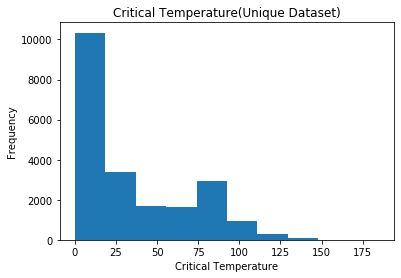

In [5]:
## Plot the critical temperature distribution 
unique.iloc[:,-2].max() ##185.0
unique.iloc[:,-2].min() ##0.00021

plt.hist(unique['critical_temp'])
plt.title('Critical Temperature(Unique Dataset)')
plt.xlabel('Critical Temperature')
plt.ylabel('Frequency')

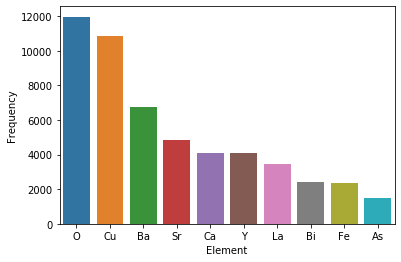

In [6]:
## Count how many nonzero numbers in columns of unique dataset 
## O, Ba, Cu, Ca, Sr, Y
freq = unique.iloc[:,:86].astype(bool).sum(axis=0).sort_values(ascending = False).head(10)
freq = pd.DataFrame(freq).reset_index()
freq.columns = ['Element','Frequency']
sns.barplot(x="Element", y="Frequency", data=freq)

In [7]:
ele_mat = unique.select_dtypes(include=np.number).corr()
element_head10 = ele_mat.iloc[:,-1].sort_values(ascending = False).head(10)
element_tail10 = ele_mat.iloc[:,-1].sort_values(ascending = False).tail(20)
element_head10

critical_temp    1.000000
O                0.566852
Ba               0.558766
Cu               0.518620
Ca               0.302206
Sr               0.271127
Y                0.248097
Hg               0.218970
Tl               0.173887
Bi               0.162499
Name: critical_temp, dtype: float64

In [8]:
## Choose features from this dataset to do prediction later
unique4 = unique[['O','Ba','Cu','Ca','Sr','Y']]

### Train dataset

Text(0, 0.5, 'Frequency')

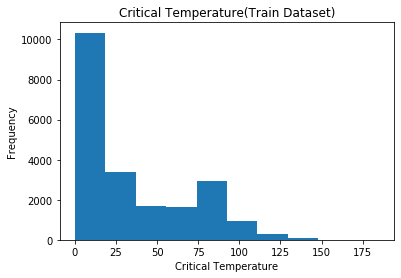

In [9]:
## Critical Temperature distribution(overview)
data.iloc[:,-1].max() ##185.0
data.iloc[:,-1].min() ##0.00021

plt.hist(data.iloc[:,-1])
plt.title('Critical Temperature(Train Dataset)')
plt.xlabel('Critical Temperature')
plt.ylabel('Frequency')

/Users/fenglanjiang/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


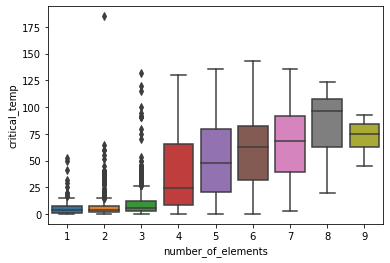

In [10]:
## Plot for the number of elements and critical temp 
sns.boxplot(data.iloc[:,0],data.iloc[:,-1])

In [11]:
## Find out the correaltion matrix 
## Not only positive correlations, but also negative correlations
corr_mat = data.select_dtypes(include=np.number).corr()
corr_mat

## 10 features that have the highest positive correlation with critical temp
head_10 = corr_mat.iloc[-1,:].sort_values(ascending = False).head(11)
head_10

## 10 features that have the highest negative correlation with critical temp
tail_10 = corr_mat.iloc[-1,:].sort_values(ascending = False).tail(10)
tail_10

gmean_FusionHeat       -0.431795
wtd_gmean_FusionHeat   -0.432365
wtd_mean_Density       -0.433940
wtd_range_Valence      -0.439901
wtd_gmean_Density      -0.540046
gmean_Density          -0.541684
gmean_Valence          -0.573068
mean_Valence           -0.600085
wtd_gmean_Valence      -0.615653
wtd_mean_Valence       -0.632401
Name: critical_temp, dtype: float64

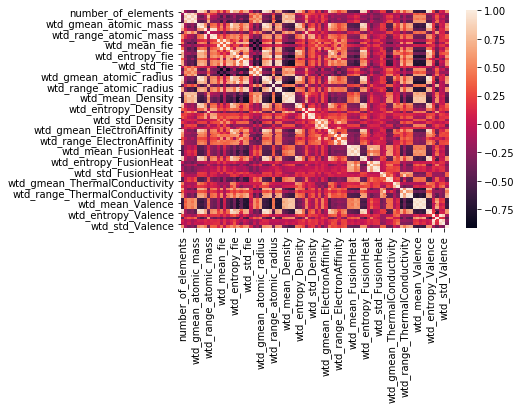

In [12]:
sns.heatmap(corr_mat)

# Select Features Based On Correlation 

### Heatmaps based on category of the features

In [13]:
## Explore the data by categories(ex. atomic mass, fie, atomic radius, etc.)
atomic_mass = data.loc[:,[col for col in data.columns if 'atomic_mass' in col]]
fie = data.loc[:,[col for col in data.columns if 'fie' in col]]
valence = data.loc[:,[col for col in data.columns if 'Valence' in col]]
atomic_radius = data.loc[:,[col for col in data.columns if 'atomic_radius' in col]]
density = data.loc[:,[col for col in data.columns if 'Density' in col]]
electron_affinity = data.loc[:,[col for col in data.columns if 'ElectronAffinity' in col]]
fusionheat = data.loc[:,[col for col in data.columns if 'FusionHeat' in col]]
thermal_conduct = data.loc[:,[col for col in data.columns if 'ThermalConductivity' in col]]

cri_temp = data.iloc[:,-1]
num_element = data.iloc[:,0]

[Text(0.5, 1, 'Fie')]

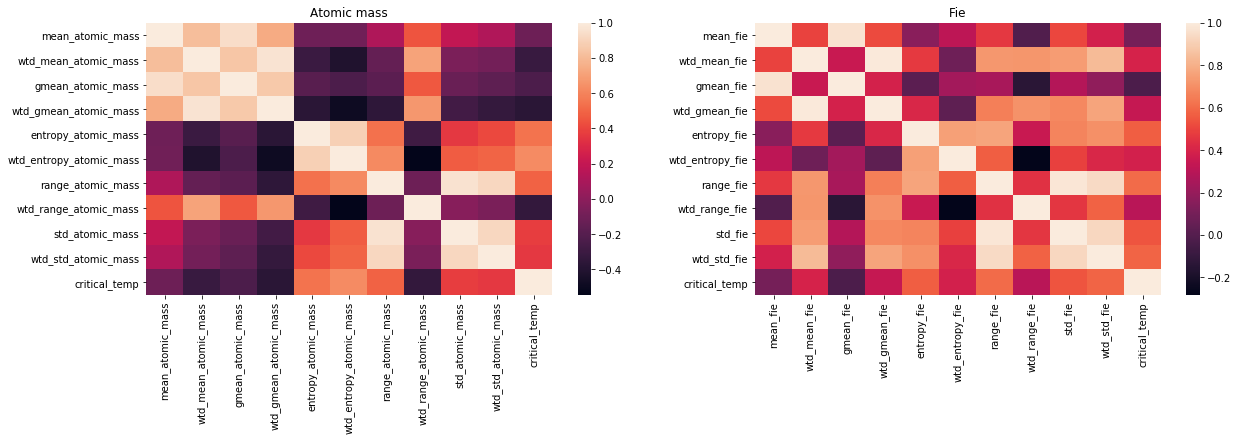

In [14]:
## heapmap based on each category
fig, (ax,ax2) = plt.subplots(ncols=2, figsize=(20,5))

atomic_mass['critical_temp'] = data.iloc[:,-1]
at_mass = atomic_mass.select_dtypes(include=np.number).corr()
sns.heatmap(at_mass,cmap="rocket",ax=ax).set(title ='Atomic mass')

fie['critical_temp'] = data.iloc[:,-1]
fi = fie.select_dtypes(include=np.number).corr()
sns.heatmap(fi,cmap="rocket", ax=ax2).set(title ='Fie')

[Text(0.5, 1, 'Atomic radius')]

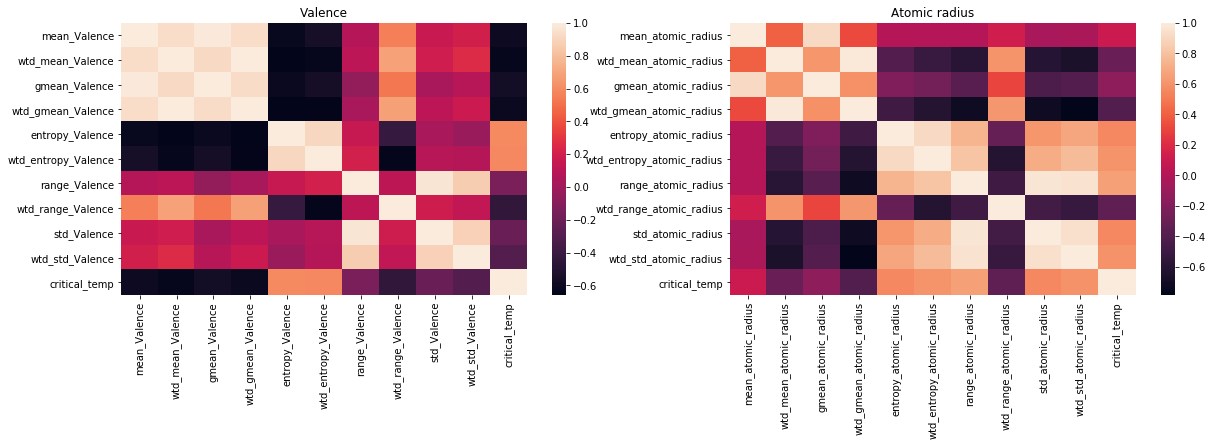

In [15]:
fig,(ax,ax2) = plt.subplots(ncols=2, figsize=(20,5))

valence['critical_temp'] = data.iloc[:,-1]
val = valence.select_dtypes(include=np.number).corr()
sns.heatmap(val,cmap="rocket",ax=ax).set(title ='Valence')

atomic_radius['critical_temp'] = data.iloc[:,-1]
at_rad = atomic_radius.select_dtypes(include=np.number).corr()
sns.heatmap(at_rad,cmap="rocket", ax=ax2).set(title ='Atomic radius')

[Text(0.5, 1, 'Electron Affinity')]

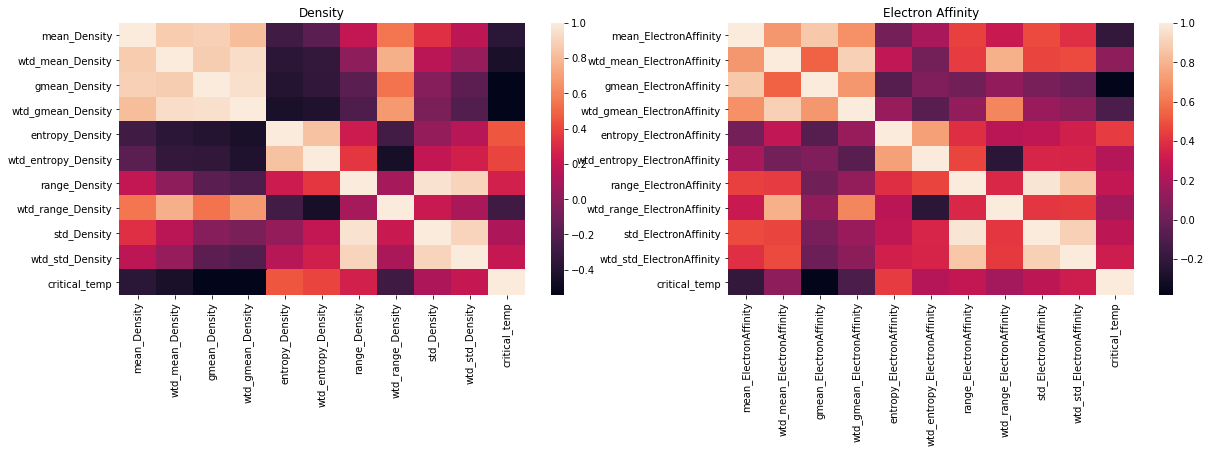

In [16]:
fig,(ax,ax2) = plt.subplots(ncols=2, figsize=(20,5))

density['critical_temp'] = data.iloc[:,-1]
den = density.select_dtypes(include=np.number).corr()
sns.heatmap(den,cmap="rocket",ax=ax).set(title ='Density')

electron_affinity['critical_temp'] = data.iloc[:,-1]
ele = electron_affinity.select_dtypes(include=np.number).corr()
sns.heatmap(ele,cmap="rocket", ax=ax2).set(title ='Electron Affinity')

[Text(0.5, 1, 'Themal Conduct')]

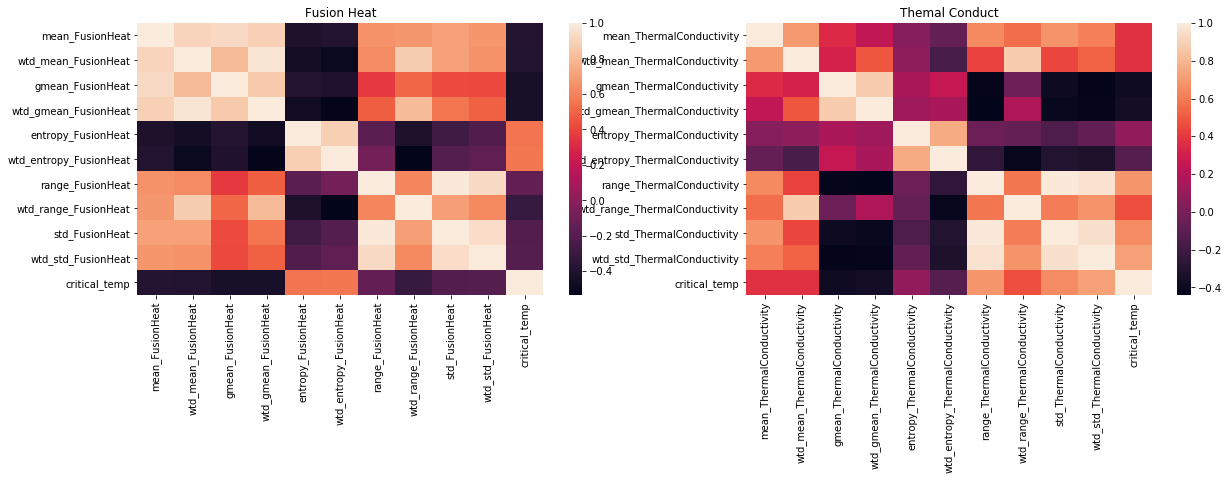

In [17]:
fig,(ax,ax2) = plt.subplots(ncols=2, figsize=(20,5))

fusionheat['critical_temp'] = data.iloc[:,-1]
fu = fusionheat.select_dtypes(include=np.number).corr()
sns.heatmap(fu,cmap="rocket",ax=ax).set(title ='Fusion Heat')

thermal_conduct['critical_temp'] = data.iloc[:,-1]
the = thermal_conduct.select_dtypes(include=np.number).corr()
sns.heatmap(the,cmap="rocket", ax=ax2).set(title ='Themal Conduct')

In [18]:
## Find the highest correlation with critical temp in each feature category
## Atomic mass: wtd_entropy_atomic_mass 0.626930, wtd_gmean_atomic_mass  -0.369858
at_mass_mat = atomic_mass.select_dtypes(include=np.number).corr()
at_mass_mat.iloc[:,-1].sort_values(ascending = False)

## Fie: range_fie  0.600790, gmean_fie -0.025103
fie_mat = fie.select_dtypes(include=np.number).corr()
fie_mat.iloc[:,-1].sort_values(ascending = False)

## Valence: entropy_Valence 0.598591, wtd_mean_Valence -0.632401
valence_mat = valence.select_dtypes(include=np.number).corr()
valence_mat.iloc[:,-1].sort_values(ascending = False)

## atomic radius: range_atomic_radius   0.653759, wtd_gmean_atomic_radius   -0.405176
atomic_radius_mat = atomic_radius.select_dtypes(include=np.number).corr()
atomic_radius_mat.iloc[:,-1].sort_values(ascending = False)

## density: entropy_Density 0.457169,  gmean_Density  -0.541684
density_mat = density.select_dtypes(include=np.number).corr()
density_mat.iloc[:,-1].sort_values(ascending = False)

## electron_affinity: entropy_ElectronAffinity  0.437207, gmean_ElectronAffinity -0.380568
electron_affinity_mat = electron_affinity.select_dtypes(include=np.number).corr()
electron_affinity_mat.iloc[:,-1].sort_values(ascending = False)

## fusionheat: wtd_entropy_FusionHeat  0.563244, wtd_gmean_FusionHeat   -0.432365
fusionheat_mat = fusionheat.select_dtypes(include=np.number).corr()
fusionheat_mat.iloc[:,-1].sort_values(ascending = False)

## thermal_conduct: wtd_std_ThermalConductivity 0.721271, gmean_ThermalConductivity  -0.387192
thermal_conduct_mat = thermal_conduct.select_dtypes(include=np.number).corr()
thermal_conduct_mat.iloc[:,-1].sort_values(ascending = False)

critical_temp                      1.000000
wtd_std_ThermalConductivity        0.721271
range_ThermalConductivity          0.687654
std_ThermalConductivity            0.653632
wtd_range_ThermalConductivity      0.469572
wtd_mean_ThermalConductivity       0.379336
mean_ThermalConductivity           0.375813
entropy_ThermalConductivity        0.085862
wtd_entropy_ThermalConductivity   -0.116728
wtd_gmean_ThermalConductivity     -0.371601
gmean_ThermalConductivity         -0.387192
Name: critical_temp, dtype: float64

### Pairplot based on each kind of variables

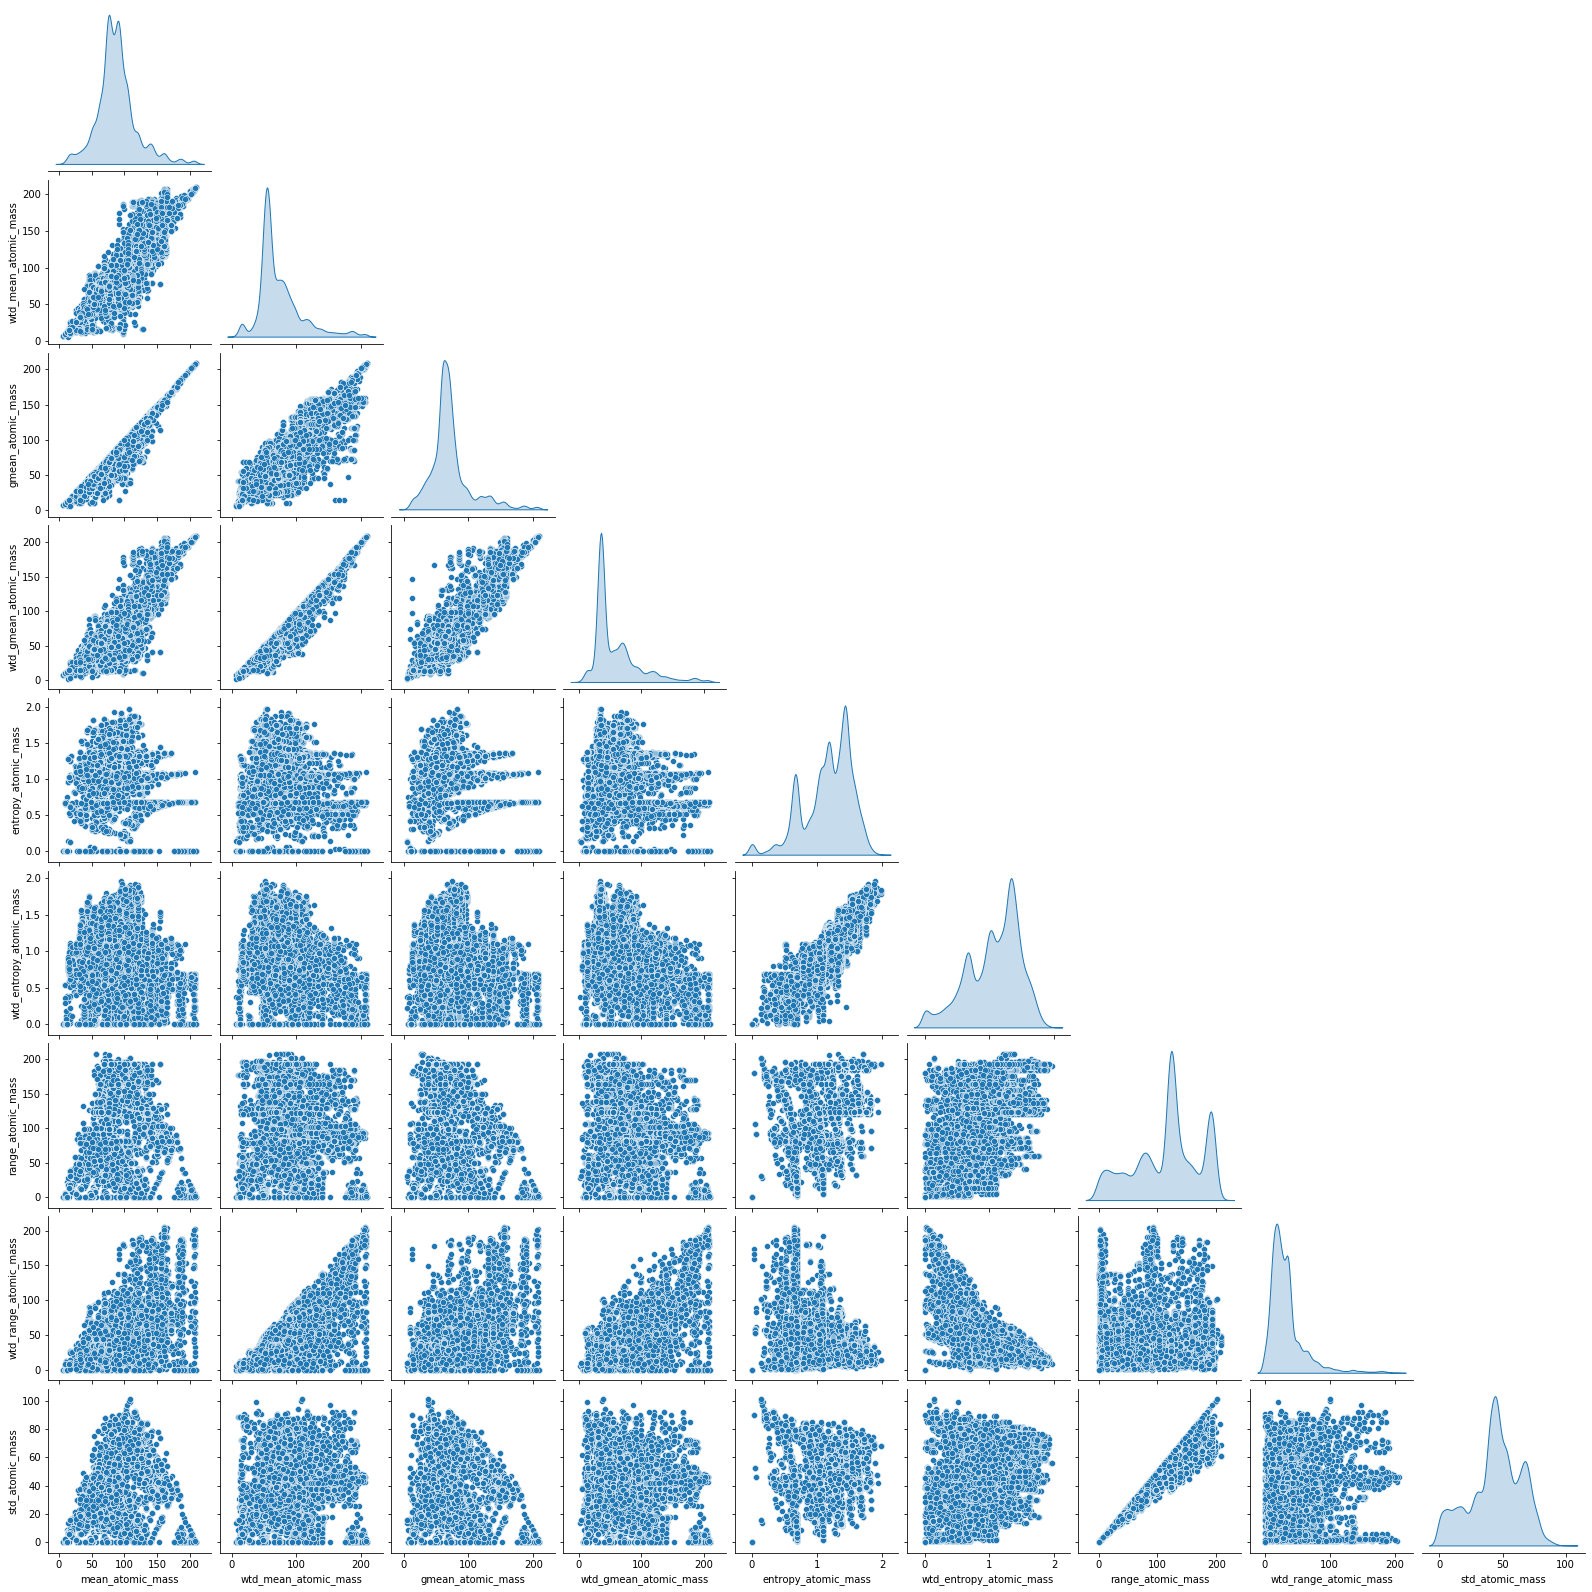

In [19]:
### Pairplot based on each category 
## drop gmean_atomic_mass, wtd_gmean_atomic_mass, range_atomic_mass
g1 = sns.pairplot(atomic_mass.iloc[:,0:9], diag_kind="kde",corner=True)

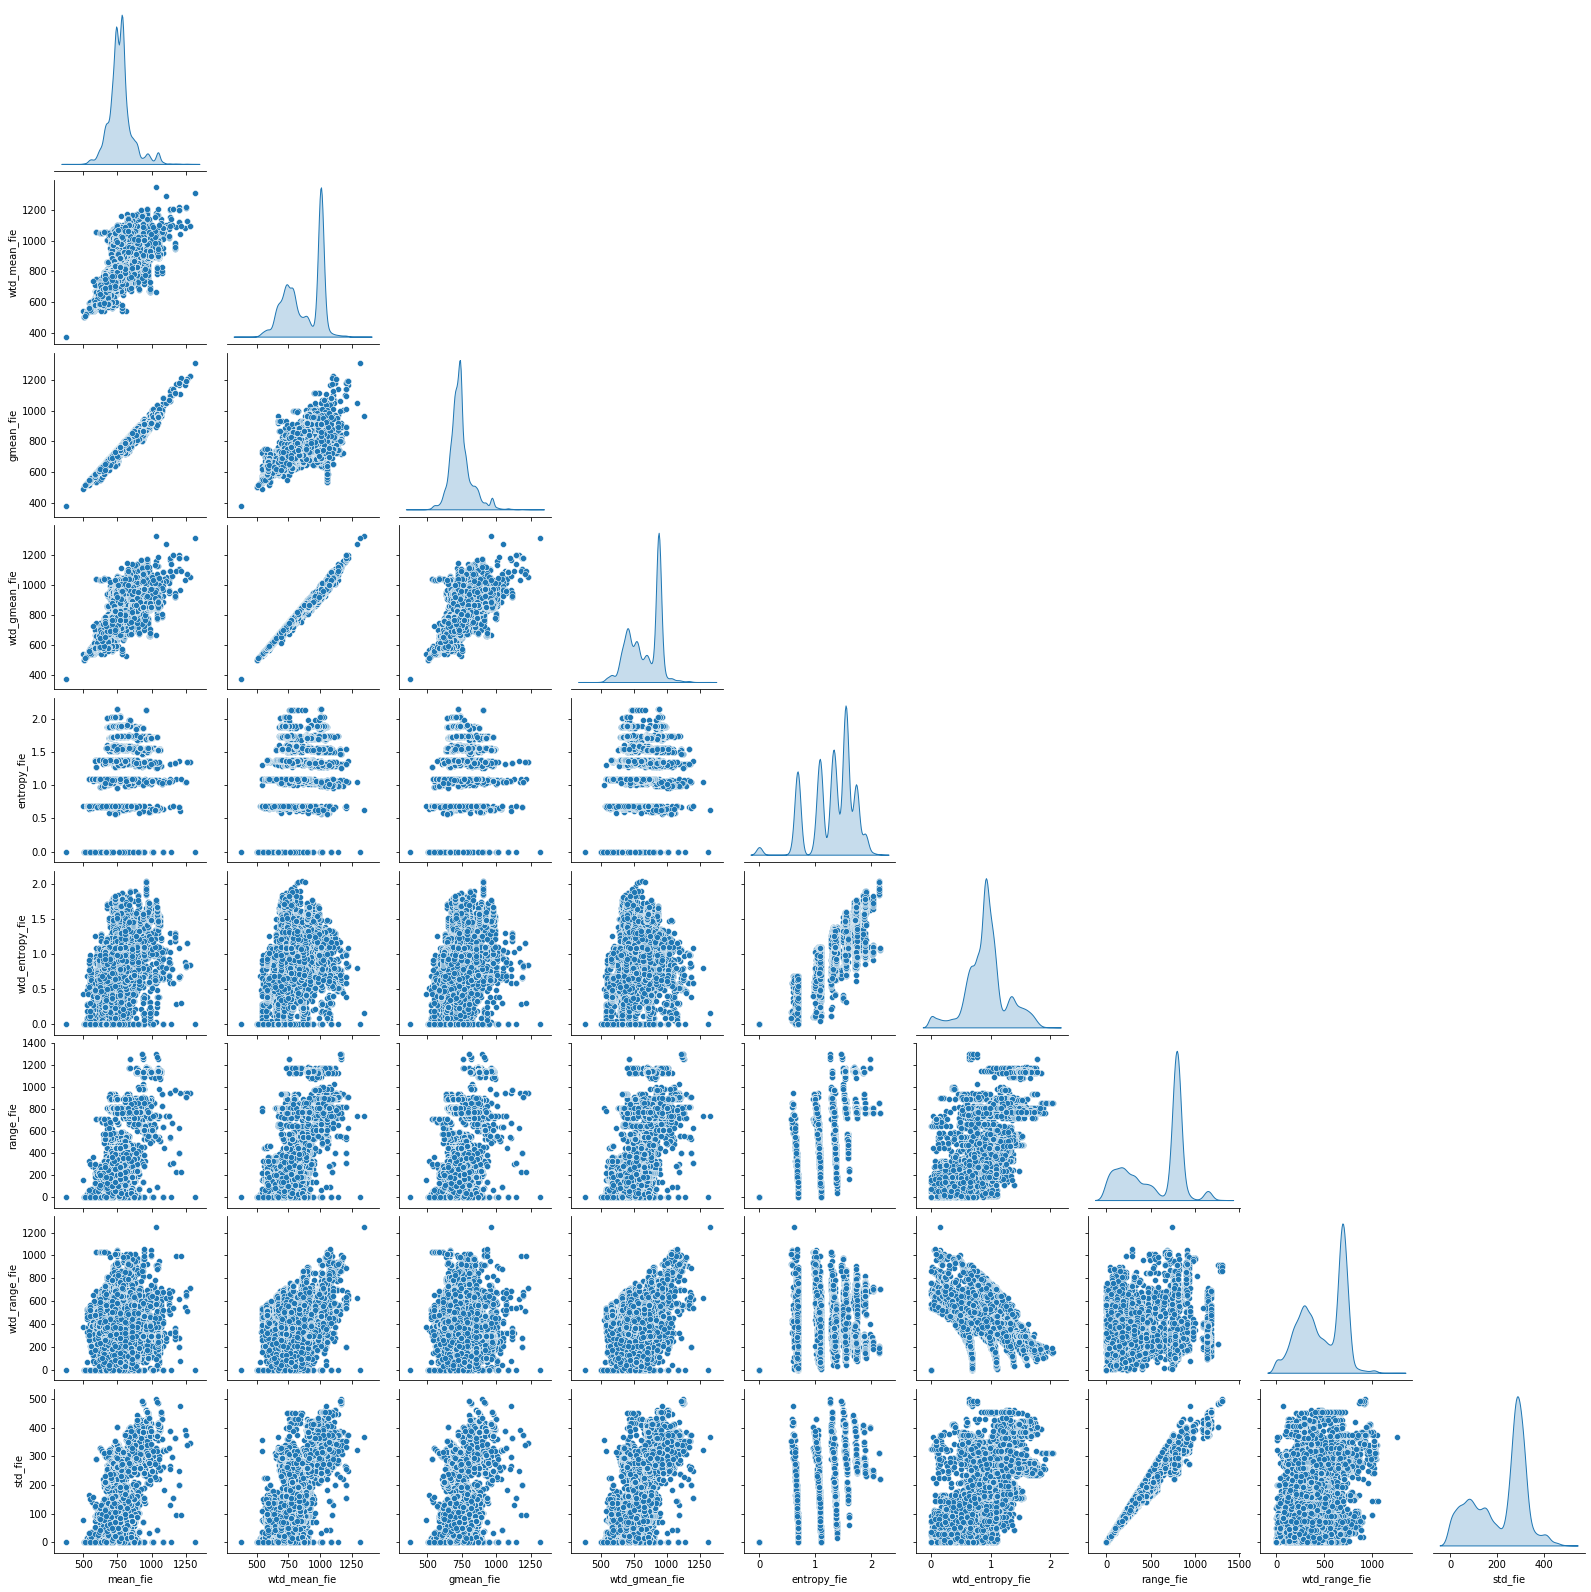

In [20]:
## drop gmean_fie, wtd_gmean_fie, range_fie
g2 = sns.pairplot(fie.iloc[:,0:9], diag_kind="kde",corner=True)

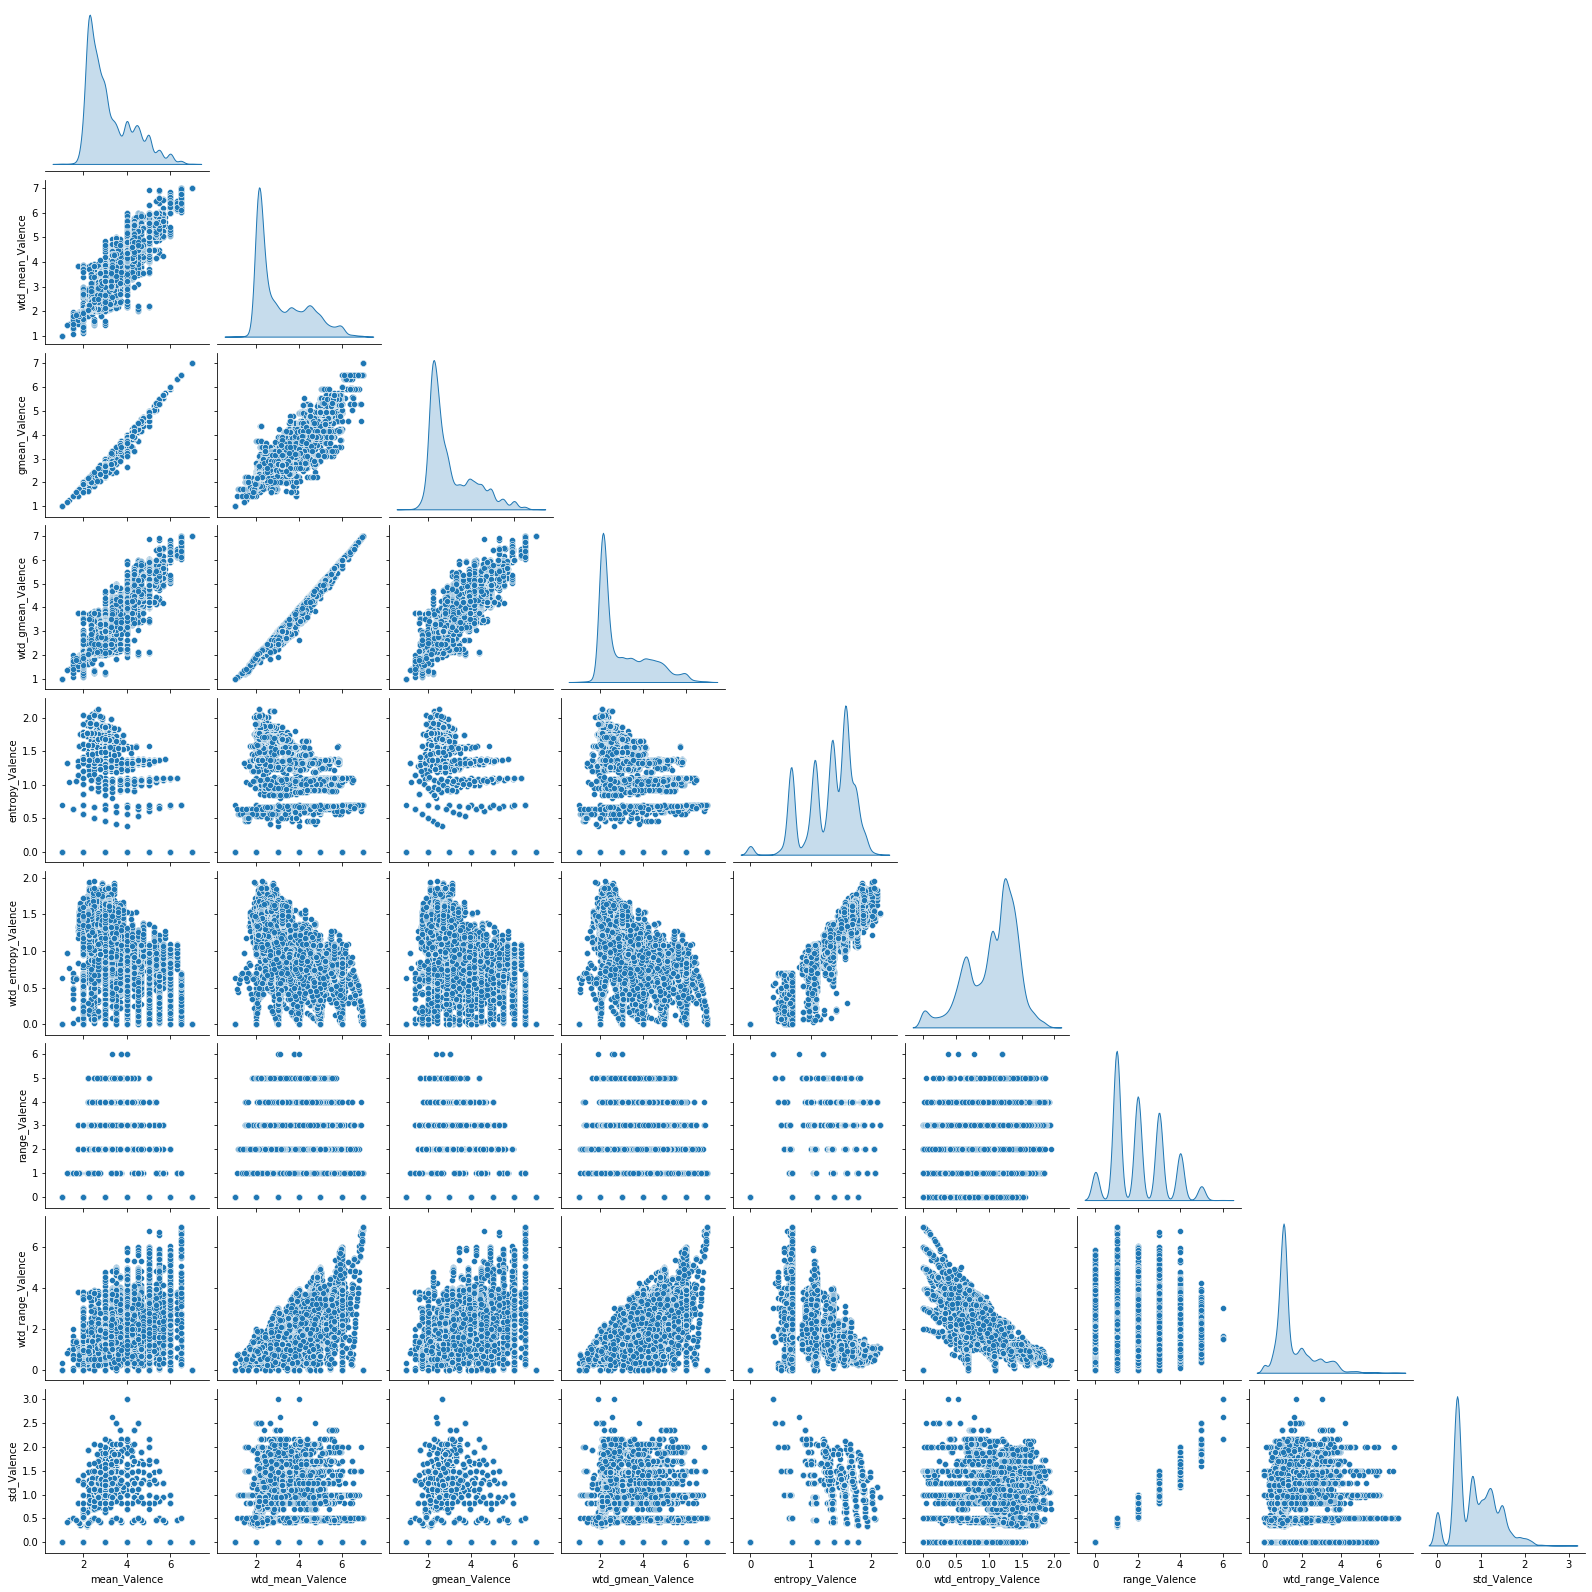

In [21]:
## drop gmean_valence, wtd_gmean_valence
g3 = sns.pairplot(valence.iloc[:,0:9], diag_kind="kde",corner=True)

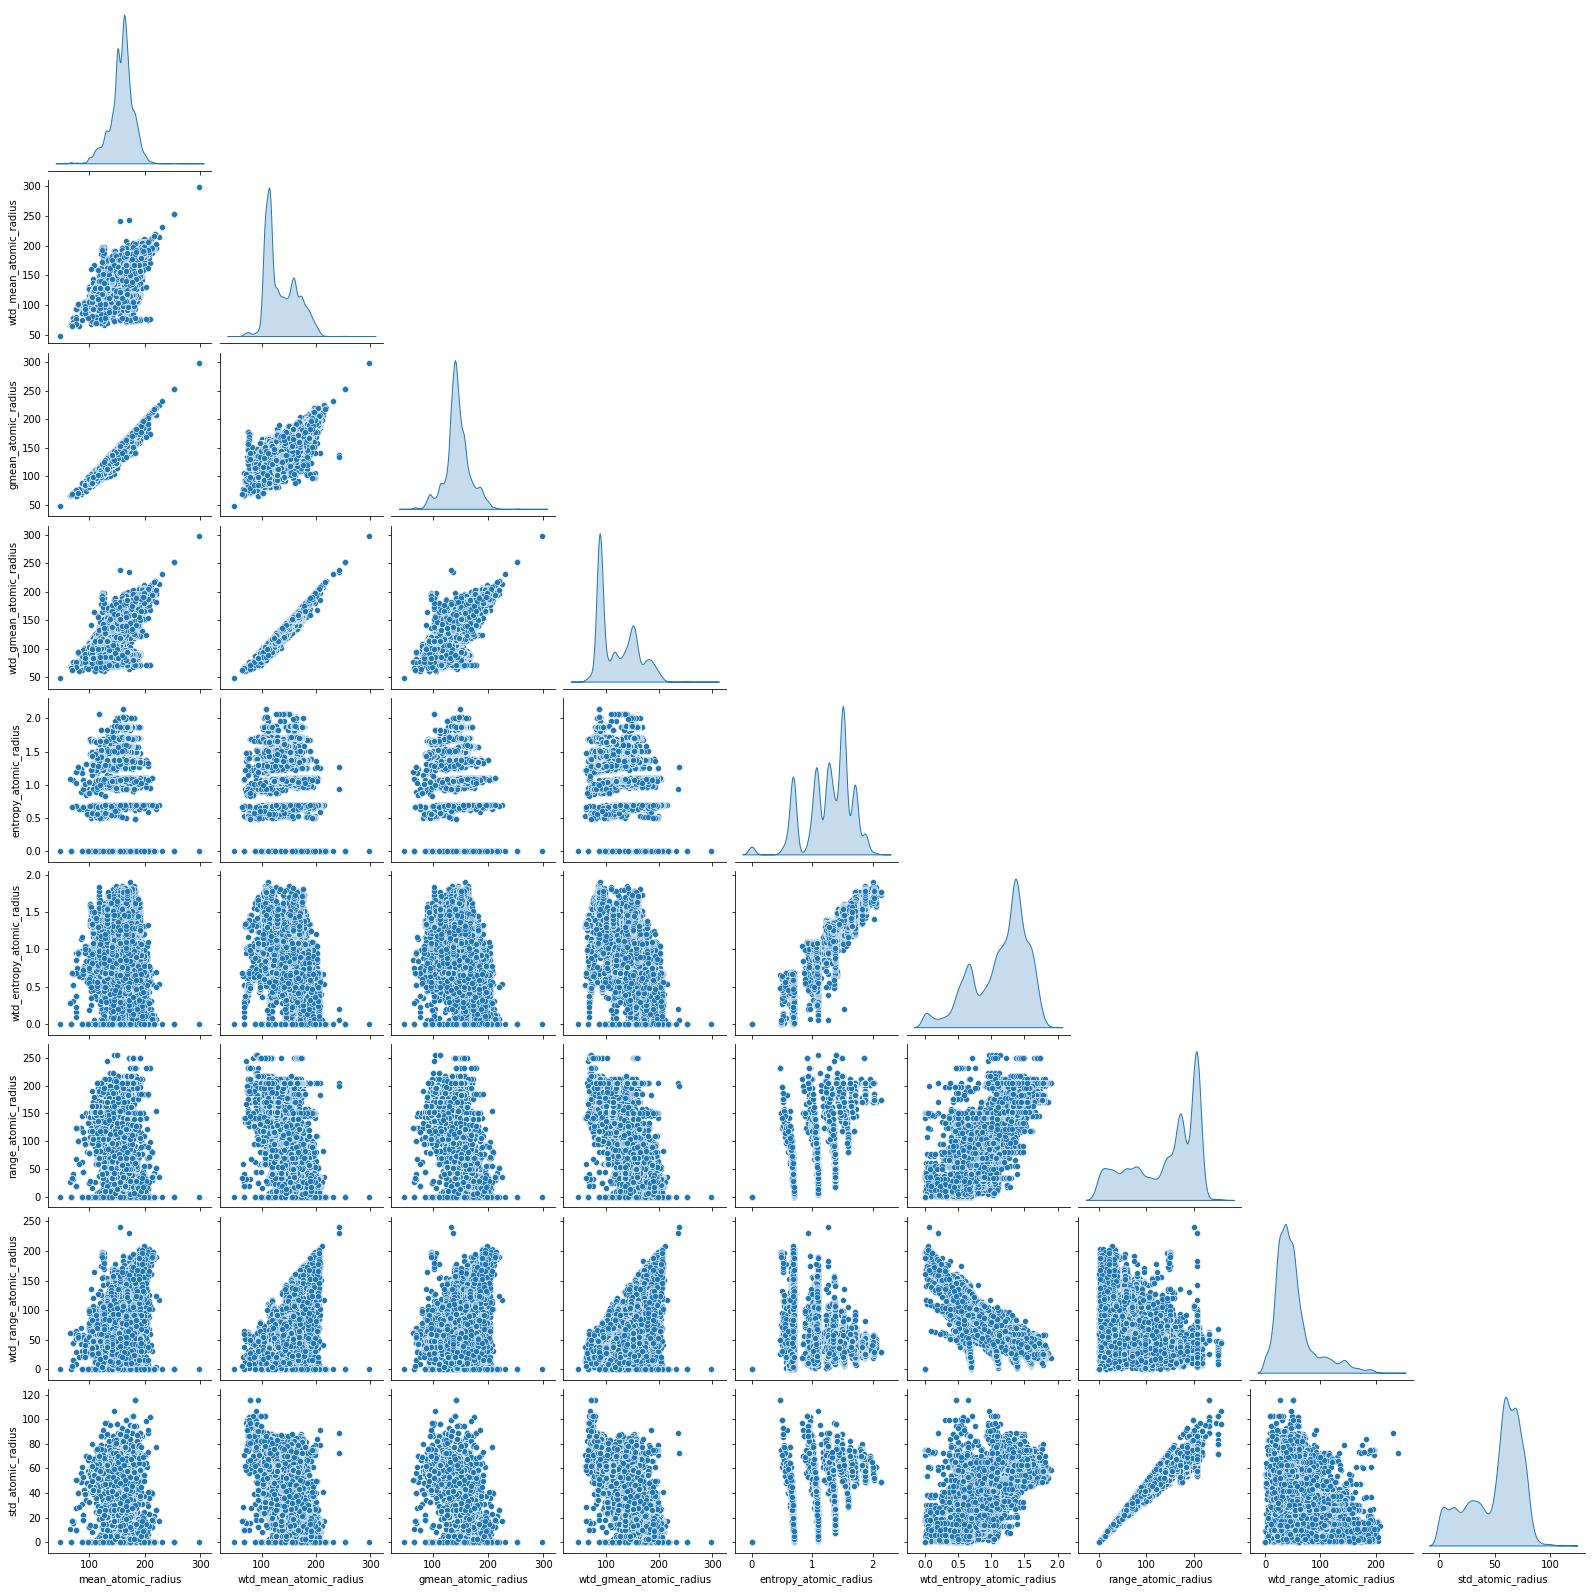

In [22]:
## drop gmean_atomic_radius, wtd_gmean_atomic_radius, range_atomic_radius 
g4 = sns.pairplot(atomic_radius.iloc[:,0:9], diag_kind="kde",corner=True)

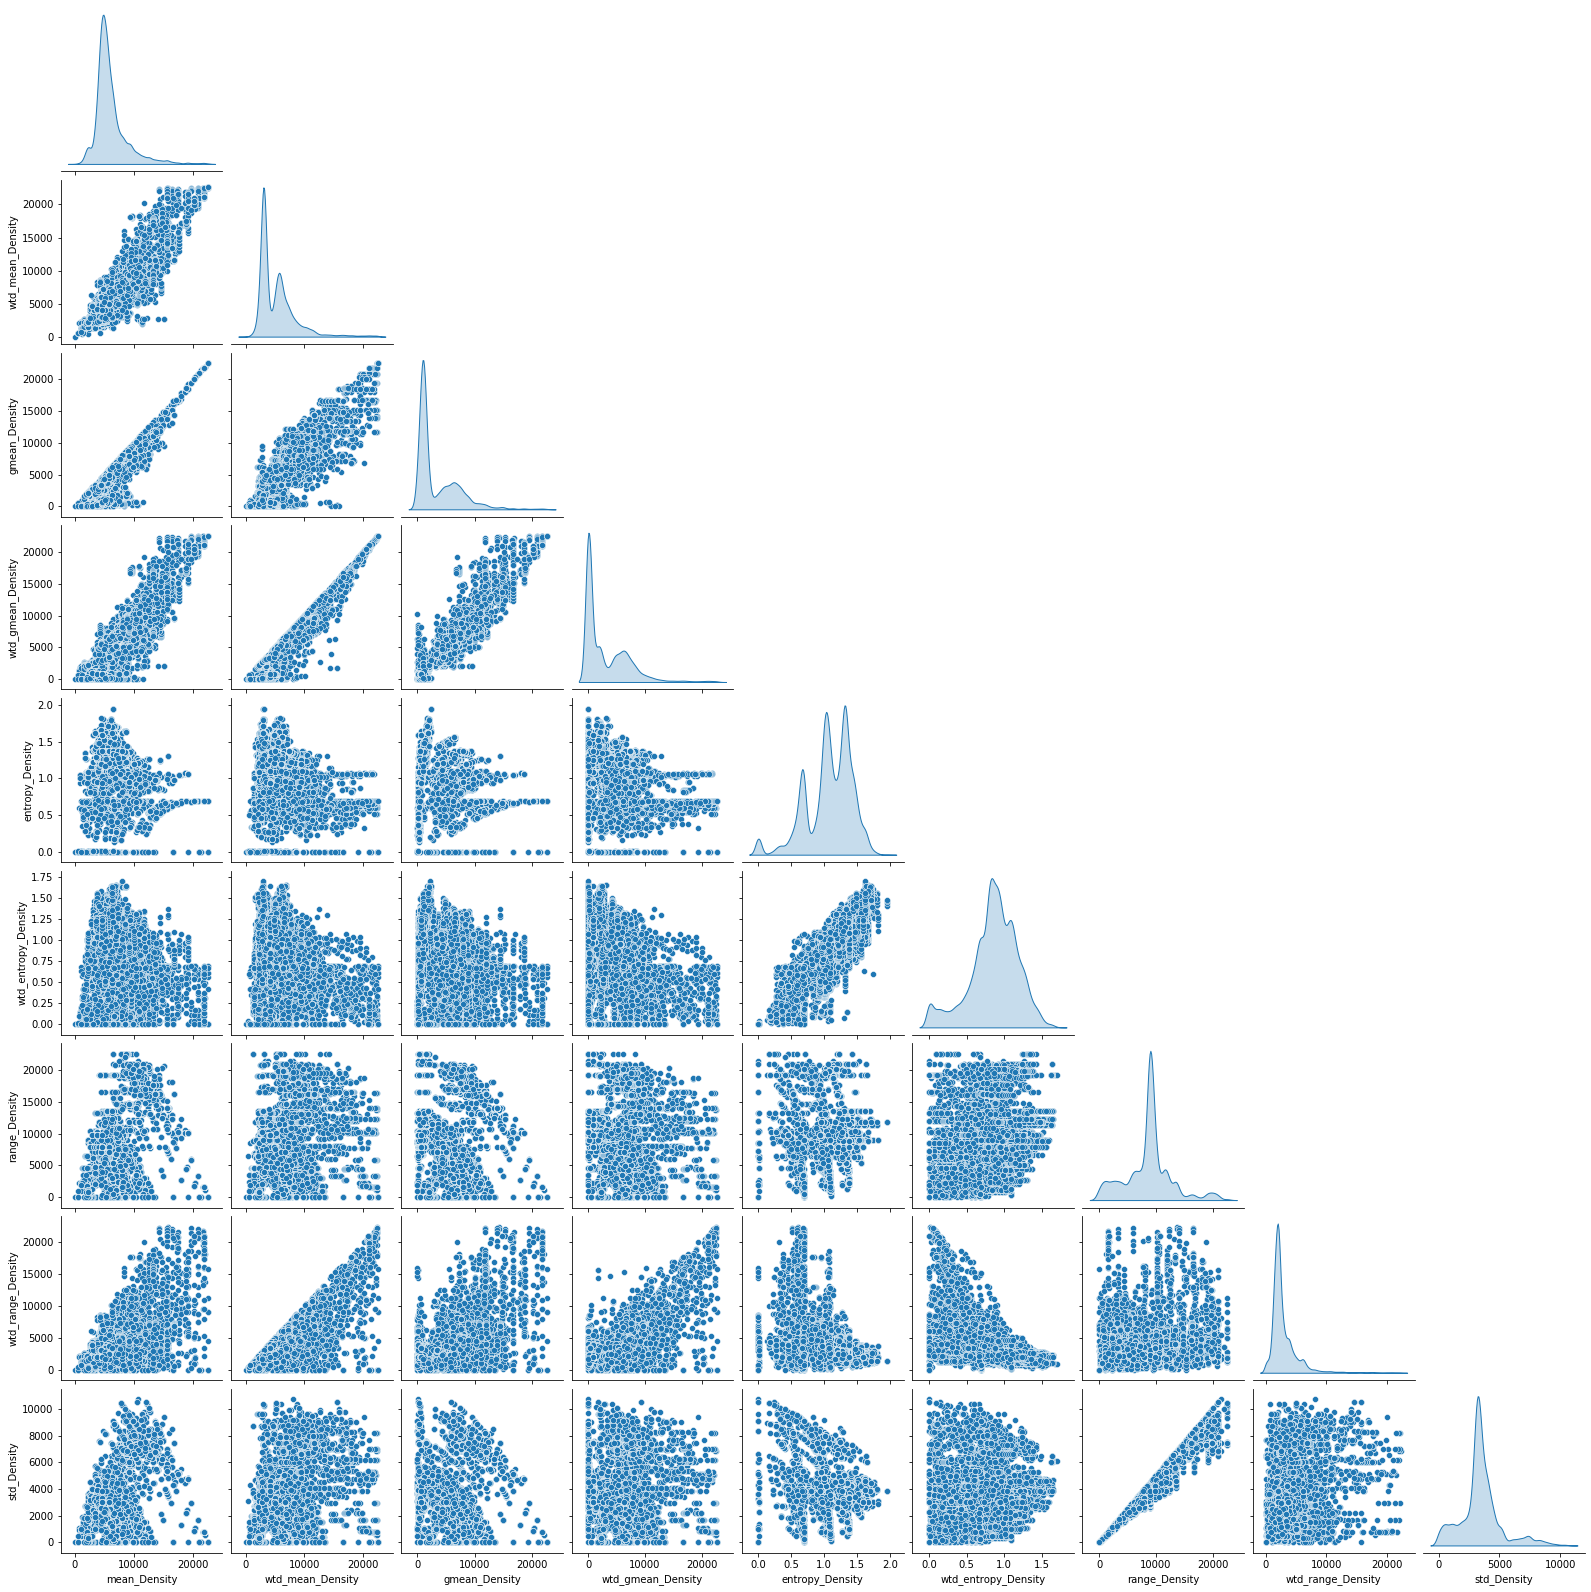

In [23]:
## drop gmean_density, wtd_gmean_density
g5 = sns.pairplot(density.iloc[:,0:9], diag_kind="kde",corner=True)

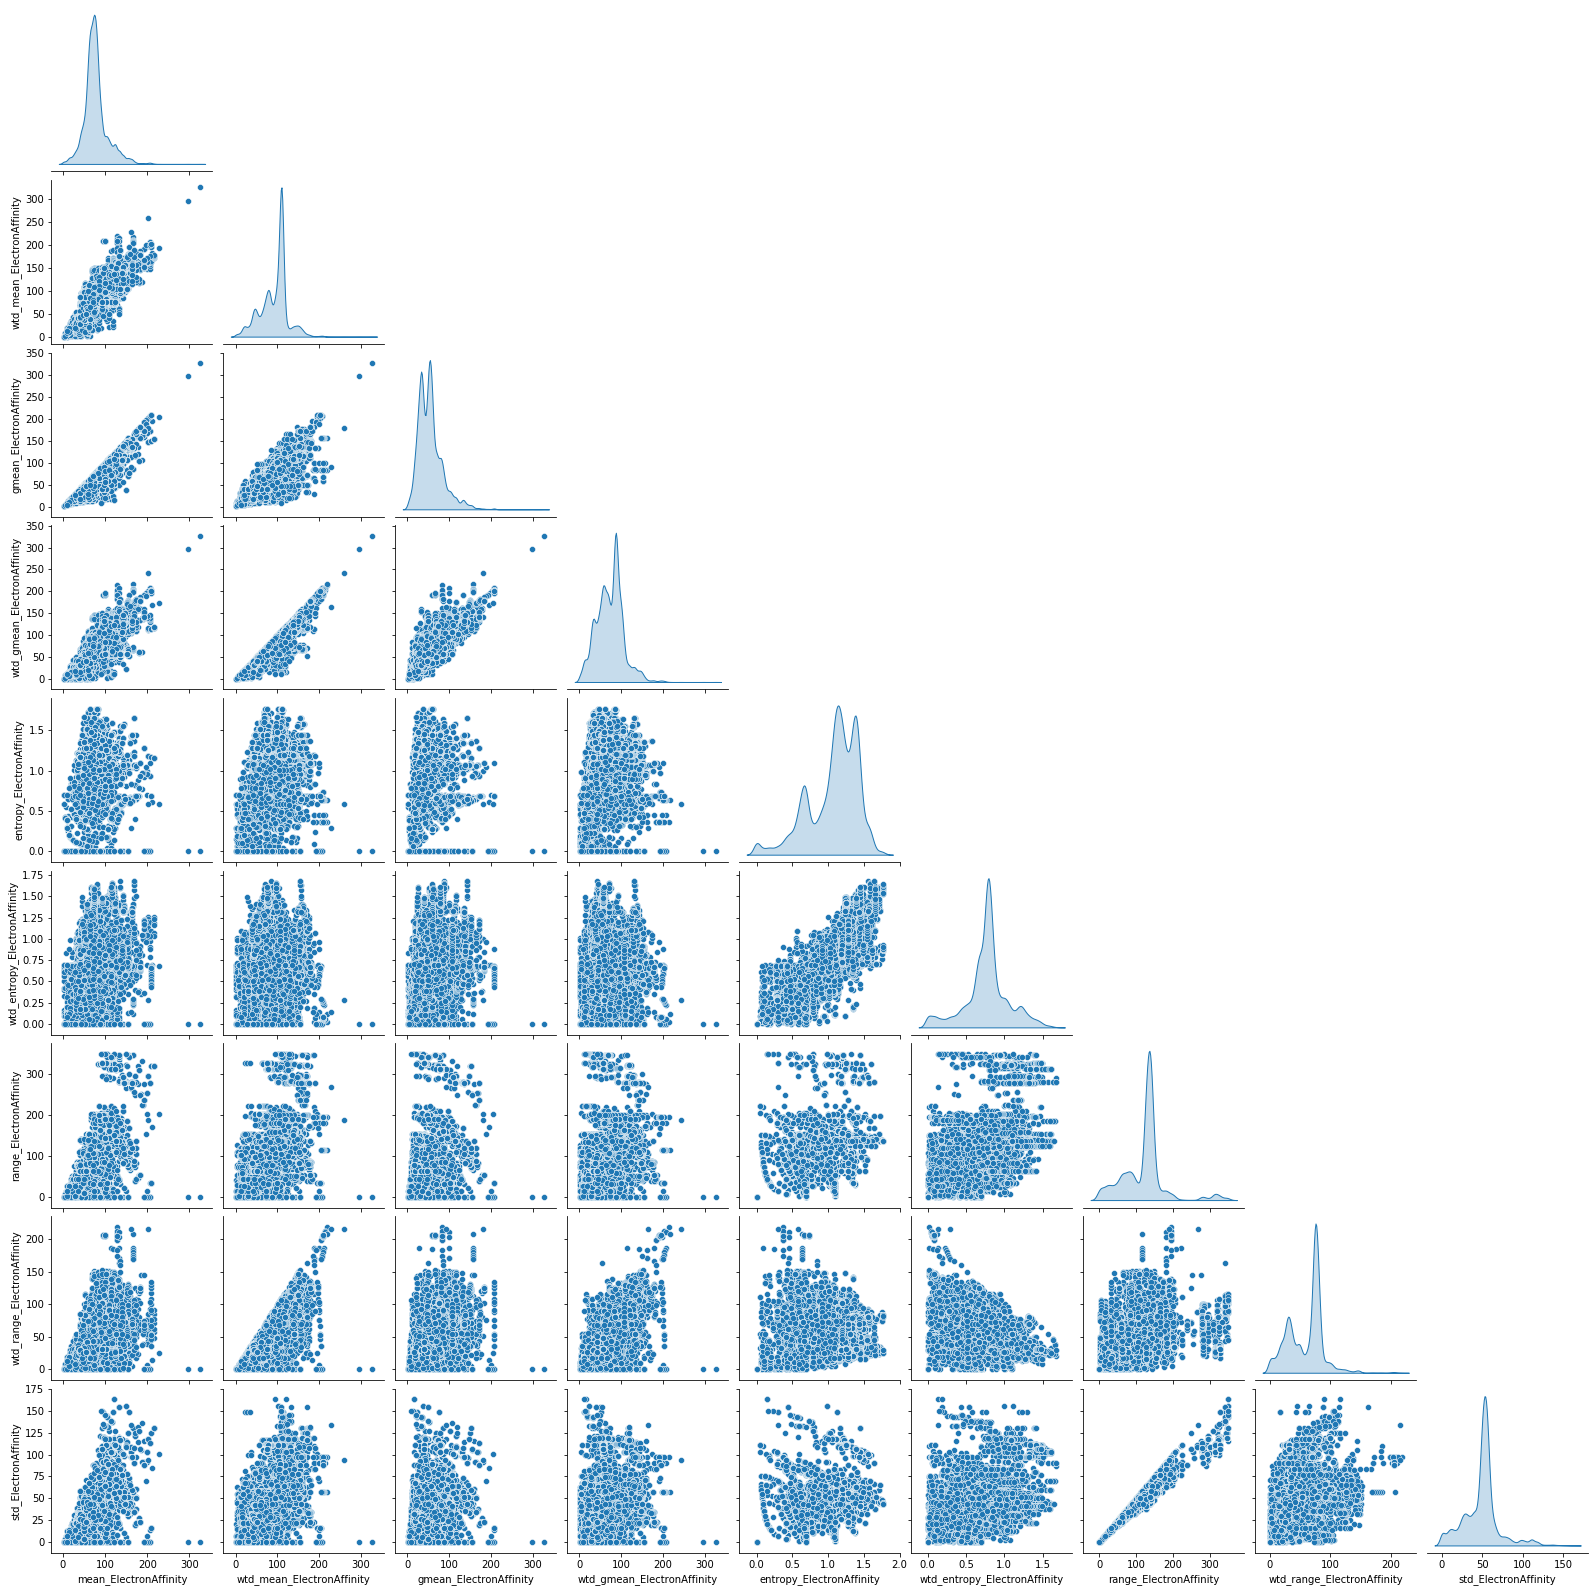

In [24]:
## drop gmean_ElectronAffinity, wtd_gmean_ElectronAffinity, range_ElectronAffinity
g6 = sns.pairplot(electron_affinity.iloc[:,0:9], diag_kind="kde",corner=True)

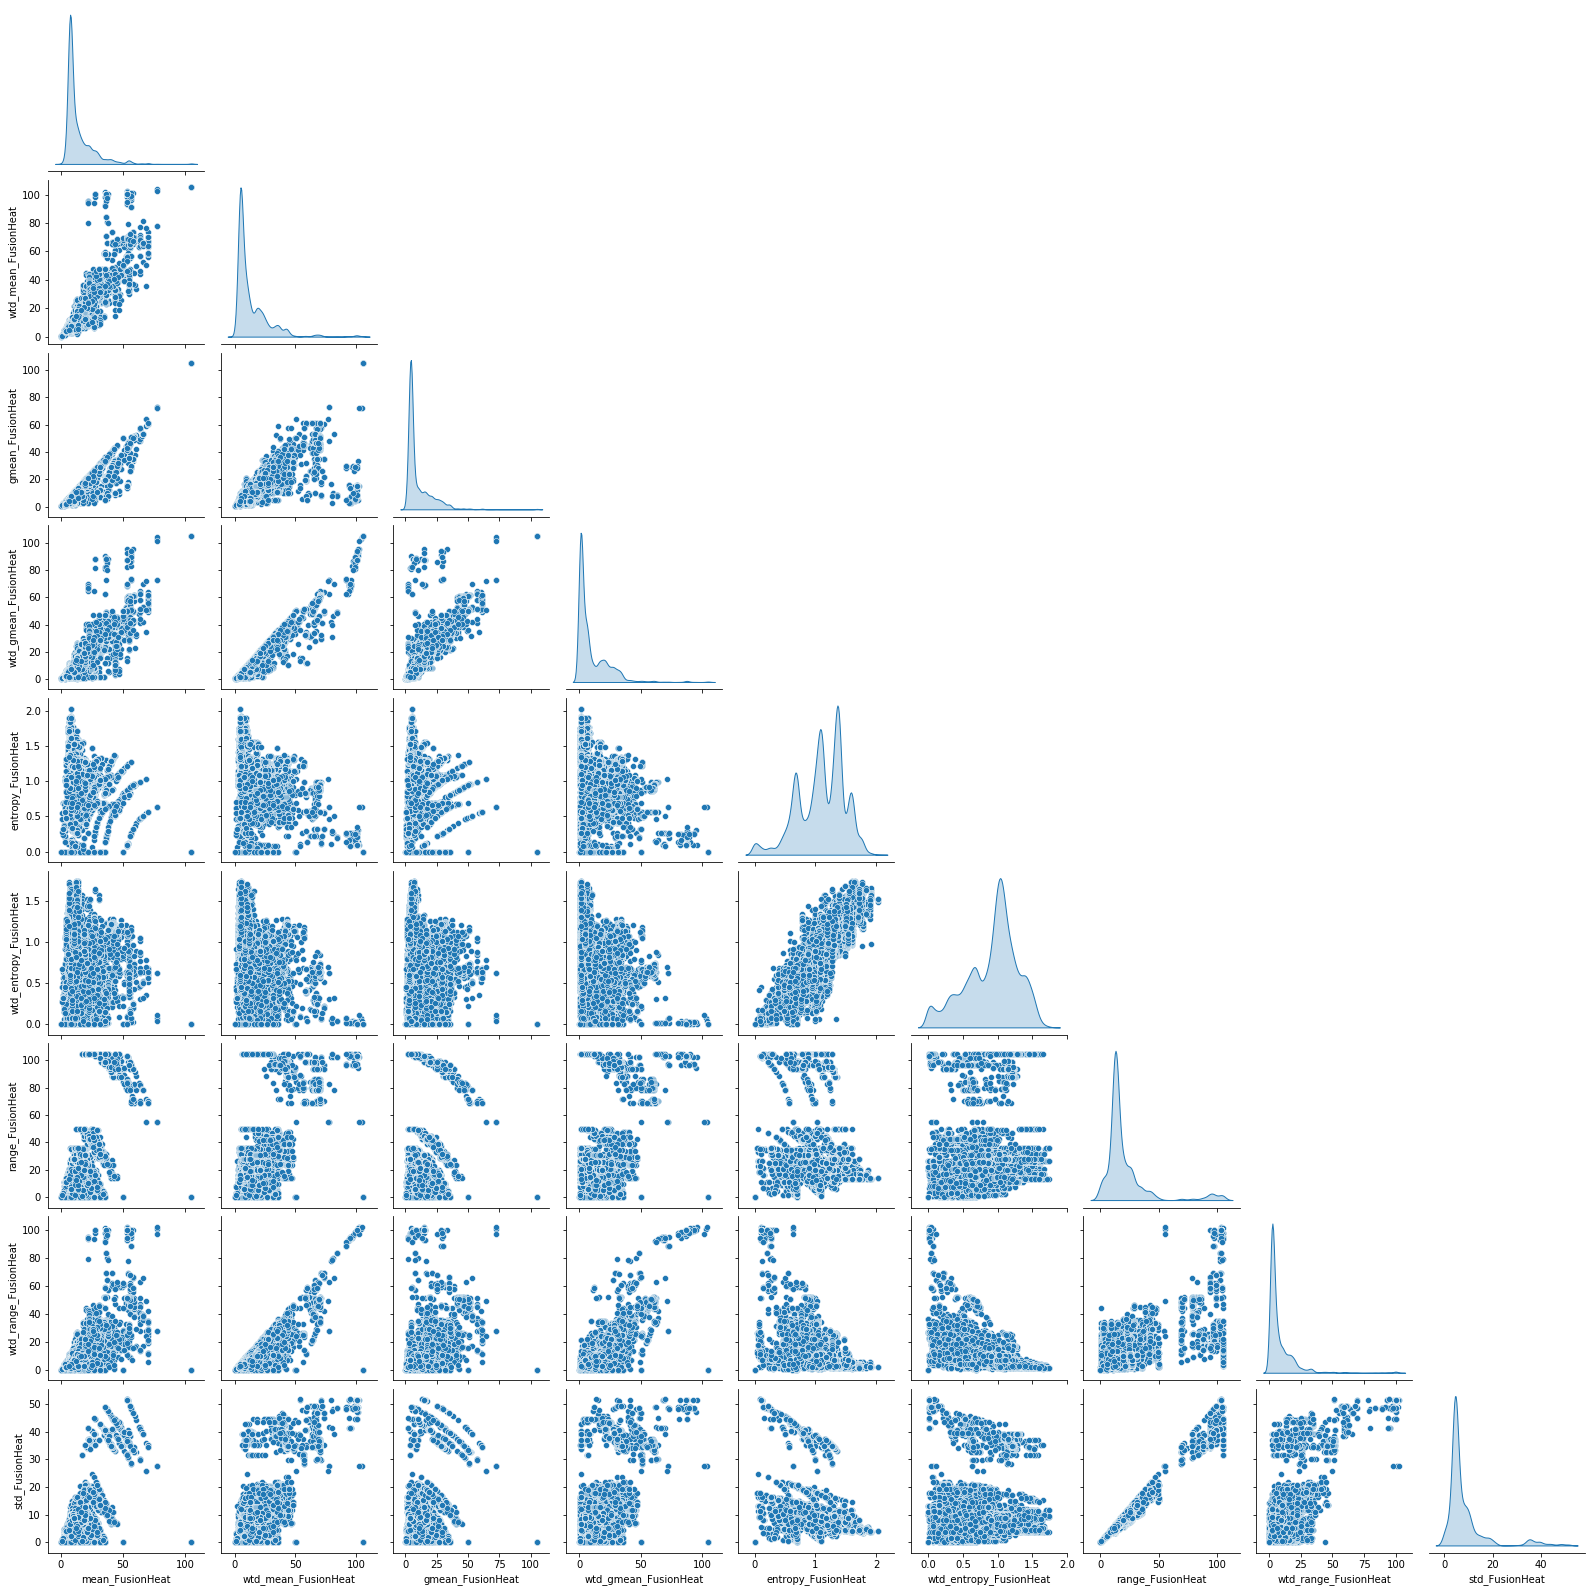

In [25]:
## drop range_FusionHeat
g7 = sns.pairplot(fusionheat.iloc[:,0:9], diag_kind="kde",corner=True)

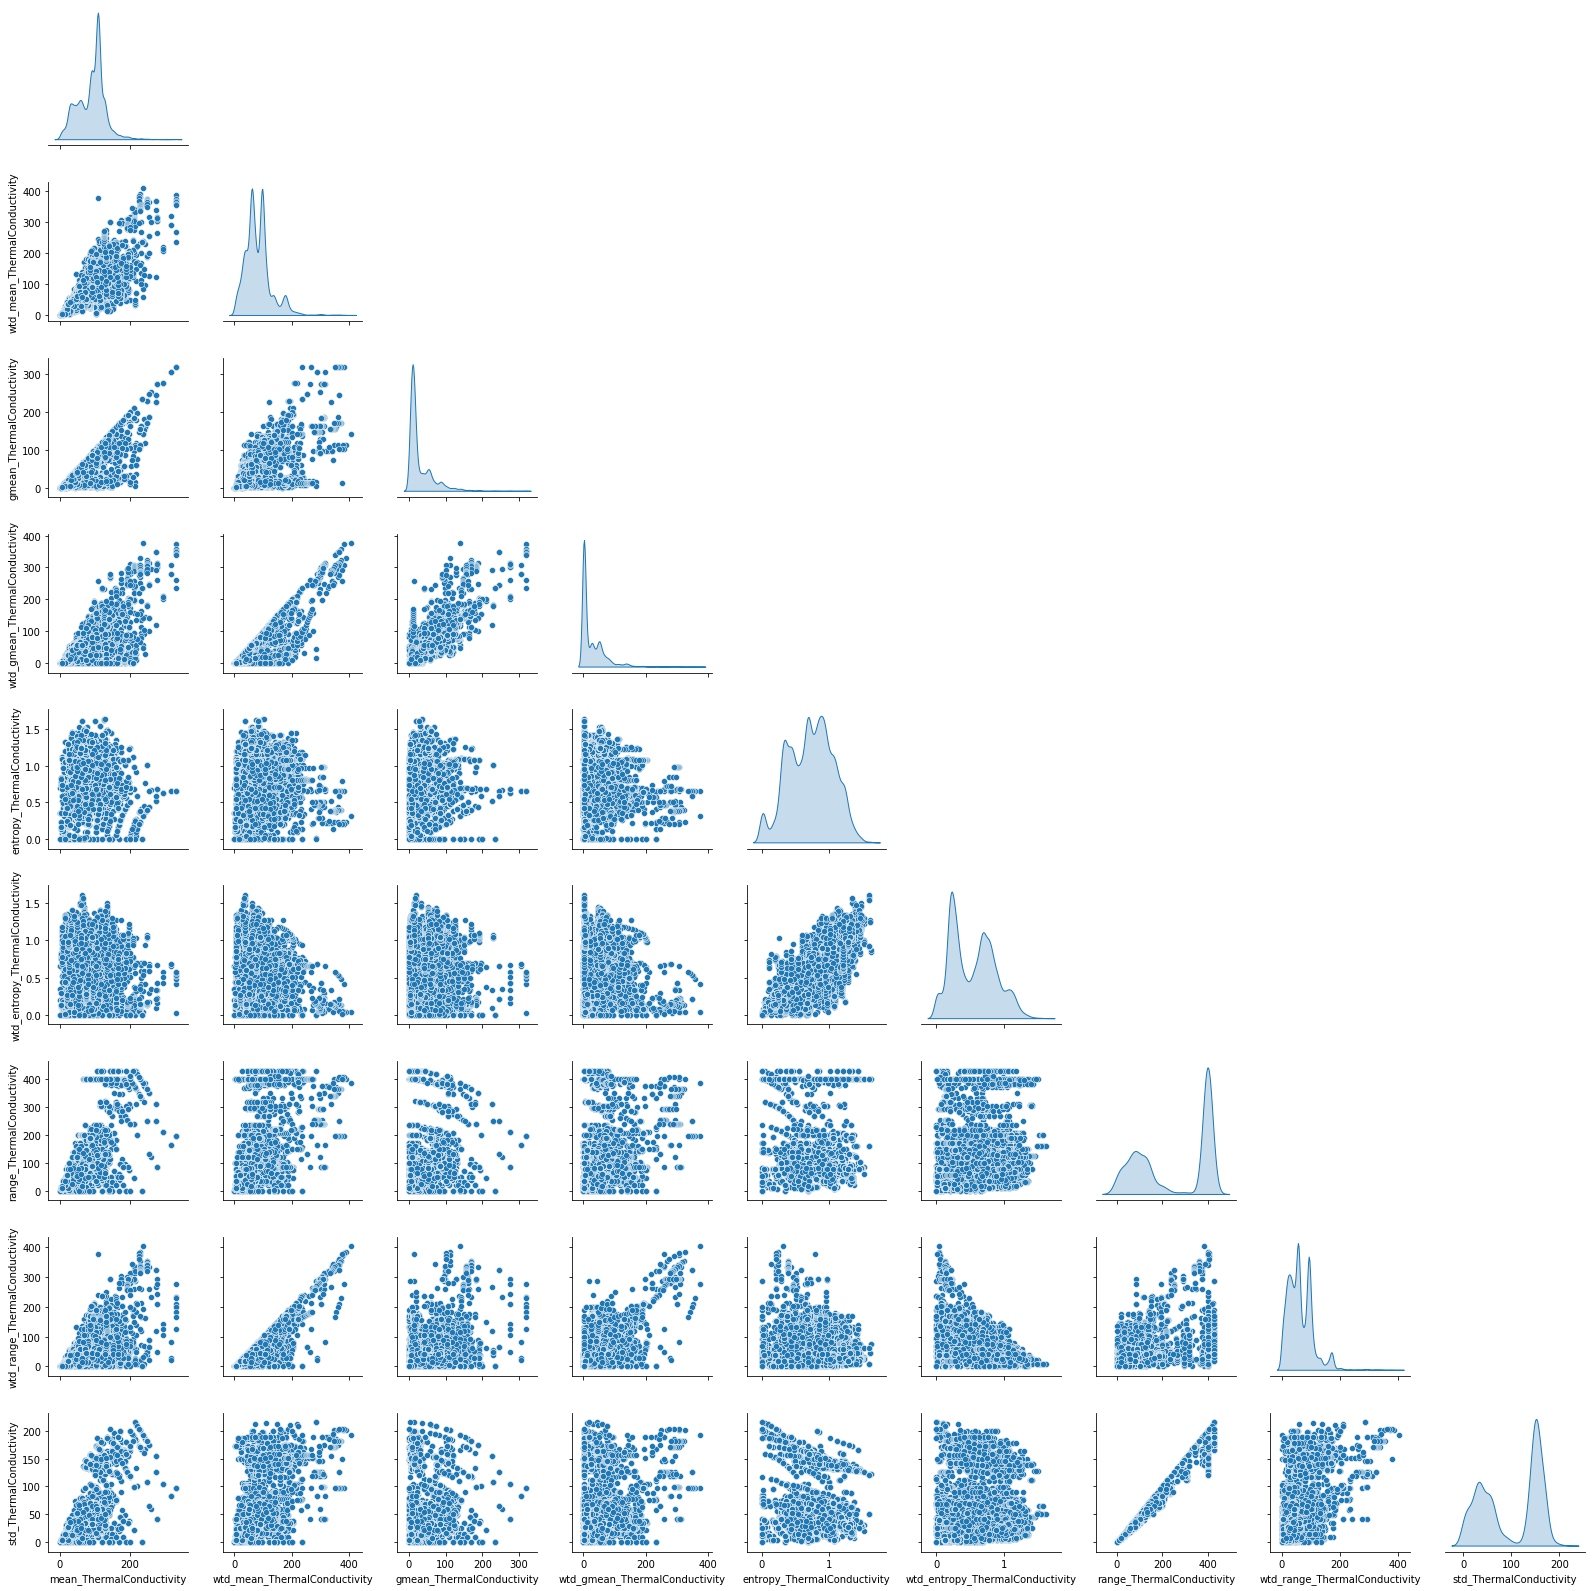

In [26]:
## Drop range_ThermalConductivity
g8 = sns.pairplot(thermal_conduct.iloc[:,0:9], diag_kind="kde",corner=True)

## Modeling based on the chosen features

In [27]:
## create a new dataframe with selected feaures
data2 = data.drop(['gmean_atomic_mass', 'wtd_gmean_atomic_mass',
                   'range_atomic_mass', 'gmean_fie', 'wtd_gmean_fie',
                   'range_fie', 'gmean_Valence', 'wtd_gmean_Valence',
                  'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 
                   'range_atomic_radius','gmean_Density', 'wtd_gmean_Density',
                'gmean_ElectronAffinity', 'wtd_gmean_ElectronAffinity', 
                   'range_ElectronAffinity','range_FusionHeat', 
                  'range_ThermalConductivity'], axis=1)

In [28]:
## Combined the selected element columns and the chosen features together
data3 = pd.concat([unique4, data2],axis = 1)

In [29]:
data3 = pd.concat([unique4, data], axis = 1)

In [30]:
data3

O    Ba   Cu   Ca   Sr    Y  number_of_elements  mean_atomic_mass  \
0       4.0  0.20  1.0  0.0  0.0  0.0                   4         88.944468   
1       4.0  0.10  0.9  0.0  0.0  0.0                   5         92.729214   
2       4.0  0.10  1.0  0.0  0.0  0.0                   4         88.944468   
3       4.0  0.15  1.0  0.0  0.0  0.0                   4         88.944468   
4       4.0  0.30  1.0  0.0  0.0  0.0                   4         88.944468   
...     ...   ...  ...  ...  ...  ...                 ...               ...   
21258   0.0  0.00  0.0  0.0  0.0  0.0                   4        106.957877   
21259  11.0  2.00  4.0  3.0  0.0  0.0                   5         92.266740   
21260   0.0  0.00  0.0  0.0  0.0  0.0                   2         99.663190   
21261   0.0  0.00  0.0  0.0  0.0  0.0                   2         99.663190   
21262   0.0  0.00  0.0  0.0  0.0  0.0                   3         87.468333   

       wtd_mean_atomic_mass  gmean_atomic_mass  ...  wtd_mean_Valence  \
0                 57.862692          66.361592  ...          2.257143   
1                 58.518416          73.132787  ...          2.257143   
2                 57.885242          66.361592  ...          2.271429   
3                 57.873967          66.361592  ...          2.264286   
4                 57.840143          66.361592  ...          2.242857   
...                     ...                ...  ...               ...   
21258             53.095769          82.515384  ...          3.555556   
21259             49.021367          64.812662  ...          2.047619   
21260             95.609104          99.433882  ...          4.800000   
21261             97.095602          99.433882  ...          4.690000   
21262             86.858500          82.555758  ...          4.500000   

       gmean_Valence  wtd_gmean_Valence  entropy_Valence  wtd_entropy_Valence  \
0           2.213364           2.219783         1.368922             1.066221   
1           1.888175           2.210679         1.557113             1.047221   
2           2.213364           2.232679         1.368922             1.029175   
3           2.213364           2.226222         1.368922             1.048834   
4           2.213364           2.206963         1.368922             1.096052   
...              ...                ...              ...                  ...   
21258       3.223710           3.519911         1.377820             0.913658   
21259       2.168944           2.038991         1.594167             1.337246   
21260       4.472136           4.781762         0.686962             0.450561   
21261       4.472136           4.665819         0.686962             0.577601   
21262       4.762203           4.242641         1.054920             0.970116   

       range_Valence  wtd_range_Valence  std_Valence  wtd_std_Valence  \
0                  1           1.085714     0.433013         0.437059   
1                  2           1.128571     0.632456         0.468606   
2                  1           1.114286     0.433013         0.444697   
3                  1           1.100000     0.433013         0.440952   
4                  1           1.057143     0.433013         0.428809   
...              ...                ...          ...              ...   
21258              1           2.168889     0.433013         0.496904   
21259              1           0.904762     0.400000         0.212959   
21260              1           3.200000     0.500000         0.400000   
21261              1           2.210000     0.500000         0.462493   
21262              3           1.800000     1.414214         1.500000   

       critical_temp  
0              29.00  
1              26.00  
2              19.00  
3              22.00  
4              23.00  
...              ...  
21258           2.44  
21259         122.10  
21260           1.98  
21261           1.84  
21262          12.80  

[21263 rows x 88 columns]

/Users/fenglanjiang/opt/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


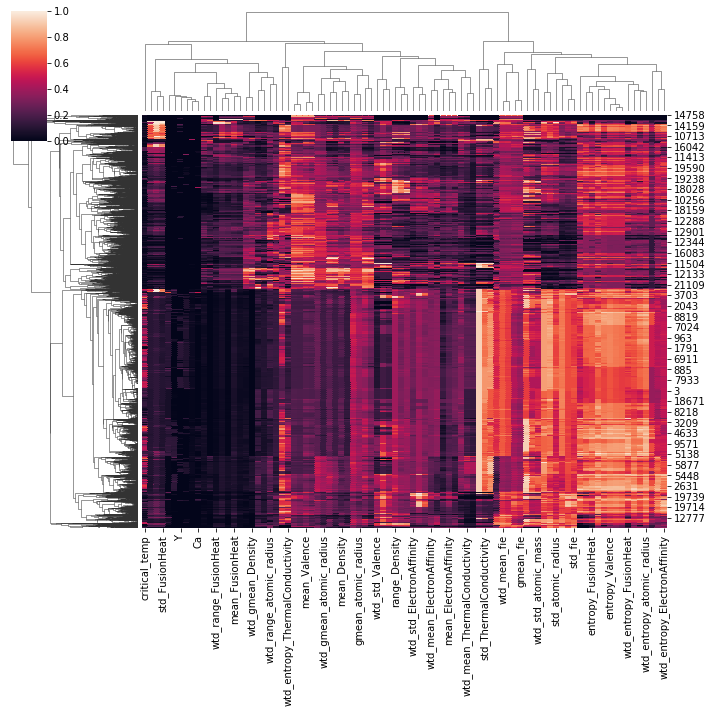

In [31]:
sns.clustermap(data3, standard_scale= 1)

## Regression Modeling

In [32]:
## Randomly separate the dataset into 70% training and 30% testing 
x = data3.loc[:, data3.columns != 'critical_temp']
y = data3['critical_temp']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=100)

### Linear Regression

In [33]:
## Fit the linear regression model and check the score of its performance
reg = LinearRegression().fit(x_train,y_train)

## Return the coefficient of determination R^2 of the prediction.
reg.score(x_train, y_train) 

0.7401672722089443

In [34]:
y_pred = reg.predict(x_test)
mean_squared_error(y_test, y_pred)

302.0476930821893

### Ridge Regression

In [35]:
## Perform ridge regression on the training dataset
## (multiple regression data that suffer from multicollinearity)
clf = Ridge(alpha=1.0)
ridge = clf.fit(x_train,y_train)

ridge.score(x_train,y_train)

0.739591293156821

In [36]:
y_pred2 = ridge.predict(x_test)
mean_squared_error(y_test, y_pred2)

302.11619131588344

## Lasso regression 

In [37]:
clf = linear_model.Lasso(alpha=0.1)
lasso = clf.fit(x_train, y_train)

lasso.score(x_train,y_train)

/Users/fenglanjiang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 989288.1413384683, tolerance: 736.8895284394707
  positive)


0.7307130600474876

In [38]:
y_pred3 = lasso.predict(x_test)
mean_squared_error(y_test, y_pred3)

309.71872528487967

## Prediction Modeling(Classifer)

In [39]:
## Separate the critical temperature into three groups and put label to each group
critical_temp = data.iloc[:,-1]

label = []
group = 0

for i in range(0, len(critical_temp)):
    if critical_temp[i] <= 5:
        group = 1 
        label.append(group)
    elif critical_temp[i] > 5 and critical_temp[i] <= 10:
        group = 2
        label.append(group)
    elif critical_temp[i] > 10 and critical_temp[i] <= 20:
        group = 3
        label.append(group)
    elif critical_temp[i] > 20 and critical_temp[i] <= 40:
        group = 4
        label.append(group)
    elif critical_temp[i] > 40 and critical_temp[i] <= 80:
        group = 5
        label.append(group)
    else:
        group = 6
        label.append(group)
        
label = pd.DataFrame(label)

In [40]:
## Combine the dataset that has selected features and the label column 
data4 = pd.concat([data3,label], axis = 1)
data4 = data4.drop('critical_temp',axis = 1)
data4 = data4.rename(columns={0: 'Group'})

In [41]:
x2 = data4.loc[:, data3.columns != 'Group']
y2 = data4['Group']
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=100)

In [42]:
y2.value_counts()

1    5093
5    3709
4    3432
6    3406
3    2895
2    2728
Name: Group, dtype: int64

## Random Forest

In [43]:
## Random Forest as a classifier
tree = RandomForestClassifier(random_state=100)
tree = tree.fit(x_train2, y_train2)
tree_pred = tree.predict(x_test2)

In [44]:
#Return the coefficient of determination  of the prediction R^2
print(tree.score(x_test2, y_test2))
print(mean_squared_error(y_test2, tree_pred))

0.9644956501293205
0.05643075476134493


In [45]:
## Computed ROC AUC score to check the model's performance 
roc_auc_score(y_test2, tree.predict_proba(x_test2), multi_class='ovr')

0.998413037981117

In [46]:
## Performed 10-fold cross validation to improve model's accuracy
scores = cross_val_score(tree, x_train2, y_train2, cv=10)
tree_score, tree_sd = scores.mean(), scores.std() 
tree_score, tree_sd

(0.9630805408583185, 0.0040967081458399305)